In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

from dynamic_indicators_script import *

import xpart as xp
import xobjects as xo

CUDA is available


In [3]:
np.linspace(0, 0.4, 41)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ])

In [4]:
file = h5py.File('/home/HPC/camontan/lhc_dynamic_indicators/out/general_scan/megno_displacement_new_b1_best_zeta_avg.h5', 'r')

In [5]:
t = 100000
disp = file[f"disp/x/megno/{t}"][:]

/tmp/ipykernel_16531/2849216665.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(disp).reshape(300,300), origin='lower')


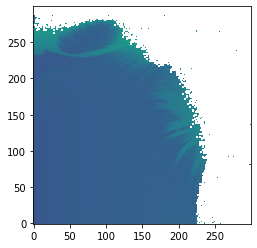

In [7]:
plt.imshow(np.log10(disp).reshape(300,300), origin='lower')

In [4]:
TURNS = 1000
samples = 100
bounds = 0.002 # [m]

In [5]:
files = os.listdir("out/quick_scan/")

In [6]:
values = []
for f in tqdm(files):
    h5 = h5py.File(f"out/quick_scan/{f}", mode="r")
    stab = h5["stability"][:].reshape(100, 100)
    h5.close()

    plt.figure()
    plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
    plt.colorbar(label="log10(stability)")
    plt.title(f[:-3])
    plt.tight_layout()
    plt.savefig(f"img/quick_scan/{f[:-3]}.jpg")
    plt.close("all")

    s_mask = stab==TURNS
    values.append((f, np.count_nonzero(s_mask)))

  0%|          | 0/120 [00:00<?, ?it/s]/tmp/ipykernel_35234/2456080108.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
100%|██████████| 120/120 [00:29<00:00,  4.01it/s]


In [7]:
sorted_vals = list(filter(lambda x: "b1" in x[0], sorted(values, key=lambda x: x[1])))
sorted_vals

element_min = sorted_vals[0][0]
element_max = sorted_vals[-1][0]
element_medium = sorted_vals[len(sorted_vals)//2][0]

/tmp/ipykernel_35234/1982189556.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
/tmp/ipykernel_35234/1982189556.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
/tmp/ipykernel_35234/1982189556.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])


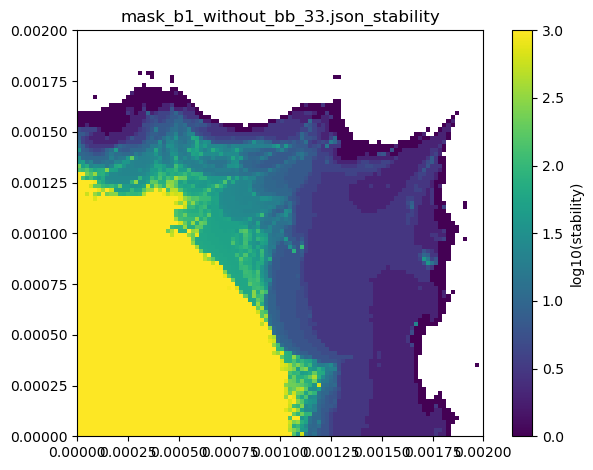

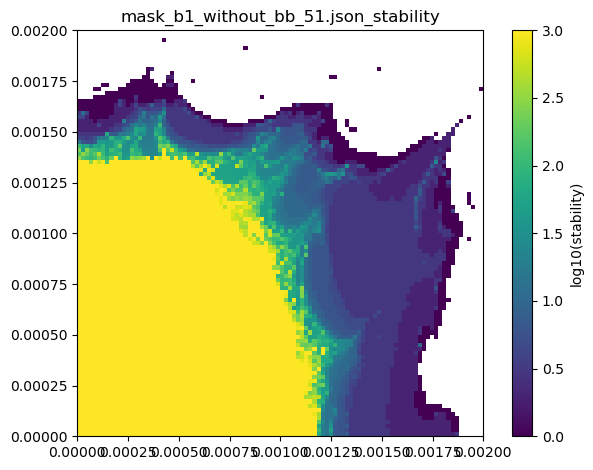

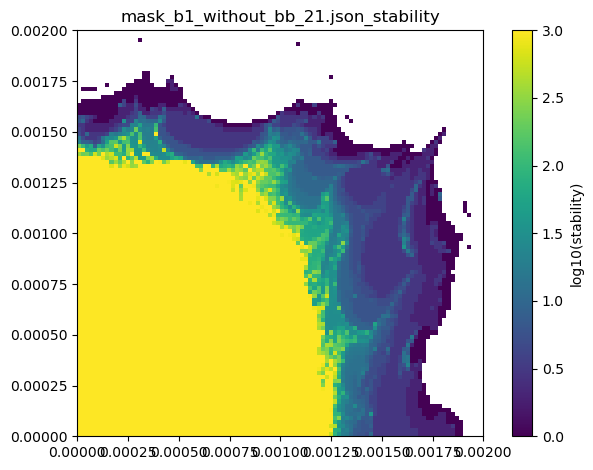

In [8]:
plt.figure()
with h5py.File(f"out/quick_scan/{element_min}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
plt.colorbar(label="log10(stability)")
plt.title(element_min[:-3])
plt.tight_layout()

plt.figure()
with h5py.File(f"out/quick_scan/{element_medium}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
plt.colorbar(label="log10(stability)")
plt.title(element_medium[:-3])
plt.tight_layout()

plt.figure()
with h5py.File(f"out/quick_scan/{element_max}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
plt.colorbar(label="log10(stability)")
plt.title(element_max[:-3])
plt.tight_layout()

In [9]:
print("min:", element_min)
print("medium:", element_medium)
print("max:", element_max)

min: mask_b1_without_bb_33.json_stability.h5
medium: mask_b1_without_bb_51.json_stability.h5
max: mask_b1_without_bb_21.json_stability.h5


In [4]:
selected_masks = [
    "mask_b1_without_bb_33.json",
    "mask_b1_without_bb_51.json",
    "mask_b1_without_bb_21.json",
]

In [7]:
zeta[:,0]

array([0.        , 0.0040404 , 0.00808081, 0.01212121, 0.01616162,
       0.02020202, 0.02424242, 0.02828283, 0.03232323, 0.03636364,
       0.04040404, 0.04444444, 0.04848485, 0.05252525, 0.05656566,
       0.06060606, 0.06464646, 0.06868687, 0.07272727, 0.07676768,
       0.08080808, 0.08484848, 0.08888889, 0.09292929, 0.0969697 ,
       0.1010101 , 0.10505051, 0.10909091, 0.11313131, 0.11717172,
       0.12121212, 0.12525253, 0.12929293, 0.13333333, 0.13737374,
       0.14141414, 0.14545455, 0.14949495, 0.15353535, 0.15757576,
       0.16161616, 0.16565657, 0.16969697, 0.17373737, 0.17777778,
       0.18181818, 0.18585859, 0.18989899, 0.19393939, 0.1979798 ,
       0.2020202 , 0.20606061, 0.21010101, 0.21414141, 0.21818182,
       0.22222222, 0.22626263, 0.23030303, 0.23434343, 0.23838384,
       0.24242424, 0.24646465, 0.25050505, 0.25454545, 0.25858586,
       0.26262626, 0.26666667, 0.27070707, 0.27474747, 0.27878788,
       0.28282828, 0.28686869, 0.29090909, 0.29494949, 0.29898

In [5]:
# use latex in matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

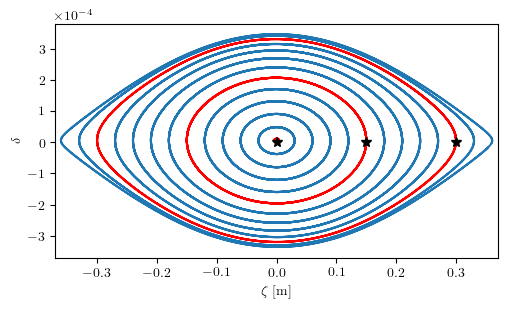

In [6]:
values = []
f = selected_masks[1]

h5 = h5py.File(f"out/longitudinal_scan/{f[:-5]}_stability.h5", mode="r")
zeta = h5["zeta"][:]
delta = h5["delta"][:]
h5.close()

plt.figure(figsize=(5, 3))
for z, d in list(zip(zeta, delta))[::3]:
    plt.plot(z, d, c="red" if z[0] in [0.0, 0.15, 0.30] else "C0")

# add black cross at y = 0 and x = [0, 0.15, 0.30]
plt.plot([0, 0.15, 0.30], [0, 0, 0], "k*", ms=7.5)
plt.xlim(-0.37, 0.37)
# set y scale to scientific notation
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

# plt.title(f[:-3])
plt.tight_layout()
plt.xlabel(r"$\zeta$ [m]")
plt.ylabel(r"$\delta$")
plt.savefig(f"img/quick_scan/longitudinal.pdf", dpi=600, bbox_inches="tight")
# plt.close("all")

In [7]:
import pickle

with open("out/time_scan.pickle", "rb") as fid:
    time_scan = pickle.load(fid)

1 samples, 10 turns: 0.09928703308105469 s, 0.009928703308105469 s/(turn*samples)
10 samples, 10 turns: 0.18986010551452637 s, 0.0018986010551452638 s/(turn*samples)
20 samples, 10 turns: 0.25709033012390137 s, 0.0012854516506195068 s/(turn*samples)
100 samples, 10 turns: 0.8932430744171143 s, 0.0008932430744171142 s/(turn*samples)
1 samples, 100 turns: 0.6660506725311279 s, 0.006660506725311279 s/(turn*samples)
10 samples, 100 turns: 1.4275636672973633 s, 0.0014275636672973634 s/(turn*samples)
20 samples, 100 turns: 2.282259702682495 s, 0.0011411298513412476 s/(turn*samples)
100 samples, 100 turns: 8.987699508666992 s, 0.0008987699508666992 s/(turn*samples)
1 samples, 500 turns: 3.6173925399780273 s, 0.0072347850799560545 s/(turn*samples)
10 samples, 500 turns: 7.224279880523682 s, 0.0014448559761047364 s/(turn*samples)
20 samples, 500 turns: 11.178857326507568 s, 0.0011178857326507568 s/(turn*samples)
100 samples, 500 turns: 43.812031269073486 s, 0.0008762406253814697 s/(turn*samples

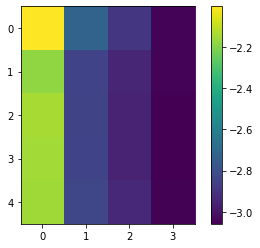

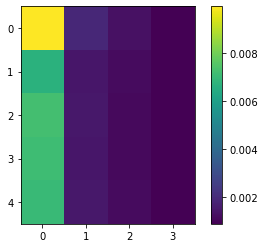

In [10]:
normed_times = np.array([t / (s * n) for s, n, t in time_scan])

for t, nt in zip(time_scan, normed_times):
    print(f"{t[0]} samples, {t[1]} turns: {t[2]} s, {nt} s/(turn*samples)")

plt.figure()
plt.imshow(np.log10(normed_times).reshape(5,4))
plt.colorbar()

plt.figure()
plt.imshow((normed_times).reshape(5,4))
plt.colorbar()

In [18]:
29.42566752433777 * 100

2942.566752433777

In [23]:
t_value = 0.0008842119693756104

In [20]:
seconds = int(29.42566752433777 * 50)
# print hours:minutes:seconds
print(f"{seconds // 3600}:{(seconds % 3600) // 60}:{seconds % 60}")

0:24:31


In [24]:
seconds = int(t_value * (100) * 1e5)
# print hours:minutes:seconds
print(f"{seconds // 3600}:{(seconds % 3600) // 60}:{seconds % 60}")

2:27:22


In [21]:
1e5 * 10 * 20

20000000.0

In [35]:
t_value = 3.029046003818512e-06

In [41]:
seconds = int(t_value * (300 * 300) * 1e5)
# print hours:minutes:seconds
print(f"{seconds // 3600}:{(seconds % 3600) // 60}:{seconds % 60}")

8:24:50


In [3]:
np.logspace(1, 5, 53, dtype=int)

array([    10,     11,     14,     17,     20,     24,     28,     34,
           41,     49,     58,     70,     83,    100,    119,    142,
          170,    203,    242,    289,    345,    412,    492,    587,
          701,    837,   1000,   1193,   1425,   1701,   2030,   2424,
         2894,   3455,   4124,   4923,   5878,   7017,   8376,  10000,
        11937,  14251,  17012,  20309,  24244,  28942,  34551,  41246,
        49238,  58780,  70170,  83767, 100000])

In [5]:
np.logspace(1, 2, 10, dtype=int)

array([ 10,  12,  16,  21,  27,  35,  46,  59,  77, 100])

In [8]:
t_samples = np.logspace(
        1,
        5,
        53
    )
t_samples = np.unique(np.round(t_samples).astype(int))
t_samples

array([    10,     12,     14,     17,     20,     24,     29,     35,
           41,     49,     59,     70,     84,    100,    119,    143,
          170,    203,    242,    289,    346,    412,    492,    588,
          702,    838,   1000,   1194,   1425,   1701,   2031,   2424,
         2894,   3455,   4125,   4924,   5878,   7017,   8377,  10000,
        11938,  14251,  17013,  20309,  24245,  28943,  34551,  41246,
        49239,  58780,  70170,  83768, 100000])

In [1]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp

## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.RFMultipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

## Choose a context
# context = xo.ContextCpu()         # For CPU
context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
tracker = xt.Tracker(_context=context, line=line)


In [2]:
backtracker = tracker.get_backtracker()

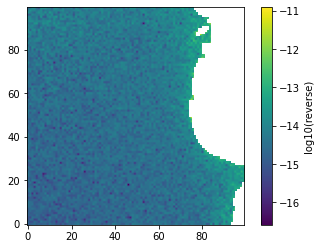

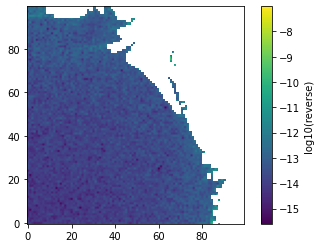

In [19]:
for t in [10, 100]:
    with h5py.File("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_test/rem_b1_worst.h5", mode="r") as h5:
        x = h5[f"reverse/x/{t}"][:]
        px = h5[f"reverse/px/{t}"][:]
        y = h5[f"reverse/y/{t}"][:]
        py = h5[f"reverse/py/{t}"][:]
        zeta = h5[f"reverse/zeta/{t}"][:]
        delta = h5[f"reverse/delta/{t}"][:]

        x0 = h5["reference/initial/x"][:]
        px0 = h5["reference/initial/px"][:]
        y0 = h5["reference/initial/y"][:]
        py0 = h5["reference/initial/py"][:]
        zeta0 = h5["reference/initial/zeta"][:]
        delta0 = h5["reference/initial/delta"][:]

    reverse = np.sqrt(
        (x - x0)**2 + (px - px0)**2 + (y - y0)**2 + (py - py0)**2
    )

    plt.figure()
    plt.imshow(np.log10(reverse).reshape(100, 100), origin="lower")
    plt.colorbar(label="log10(reverse)")

/tmp/ipykernel_9334/3622882471.py:11: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(disp_zeta/t).reshape(100, 100), origin="lower")


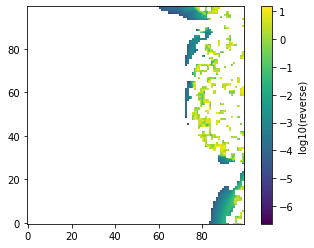

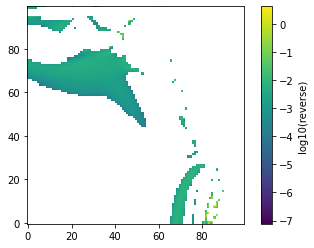

In [18]:
for t in [10, 100]:
    with h5py.File("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_test/log_displacement_singles_b1_worst.h5", mode="r") as h5:
        disp_x = h5[f"disp/x/log_disp/{t}"][:]
        disp_px = h5[f"disp/px/log_disp/{t}"][:]
        disp_y = h5[f"disp/y/log_disp/{t}"][:]
        disp_py = h5[f"disp/py/log_disp/{t}"][:]
        disp_zeta = h5[f"disp/zeta/log_disp/{t}"][:]
        disp_delta = h5[f"disp/delta/log_disp/{t}"][:]

    plt.figure()
    plt.imshow(np.log10(disp_zeta/t).reshape(100, 100), origin="lower")
    plt.colorbar(label="log10(reverse)")

/tmp/ipykernel_9334/3108685700.py:11: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(disp_zeta/t).reshape(100, 100), origin="lower")


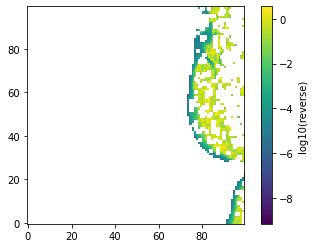

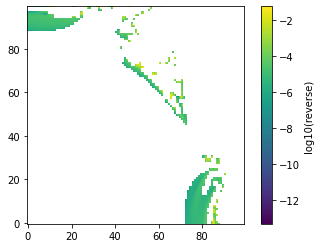

In [22]:
for t in [10, 100]:
    with h5py.File("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_test/log_displacement_singles_birkhoff_b1_worst.h5", mode="r") as h5:
        disp_x = h5[f"disp/x/log_disp/{t}"][:]
        disp_px = h5[f"disp/px/log_disp/{t}"][:]
        disp_y = h5[f"disp/y/log_disp/{t}"][:]
        disp_py = h5[f"disp/py/log_disp/{t}"][:]
        disp_zeta = h5[f"disp/zeta/log_disp/{t}"][:]
        disp_delta = h5[f"disp/delta/log_disp/{t}"][:]

    plt.figure()
    plt.imshow(np.log10(disp_zeta/t).reshape(100, 100), origin="lower")
    plt.colorbar(label="log10(reverse)")

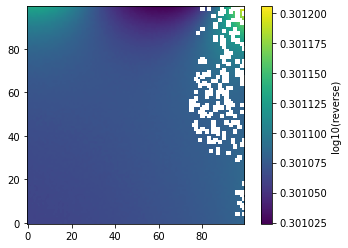

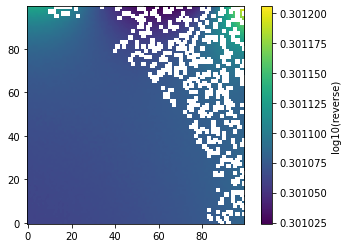

In [25]:
for t in [10, 100]:
    with h5py.File("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_test/megno_displacement_b1_worst.h5", mode="r") as h5:
        disp_x = h5[f"disp/x/megno/{t}"][:]
        disp_px = h5[f"disp/px/megno/{t}"][:]
        disp_y = h5[f"disp/y/megno/{t}"][:]
        disp_py = h5[f"disp/py/megno/{t}"][:]
        disp_zeta = h5[f"disp/zeta/megno/{t}"][:]
        disp_delta = h5[f"disp/delta/megno/{t}"][:]

    plt.figure()
    plt.imshow((disp_zeta).reshape(100, 100), origin="lower")
    plt.colorbar(label="log10(reverse)")

In [4]:
t = 100
with h5py.File("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_test/log_displacement_singles_b1_worst.h5", mode="r") as h5:
    disp_x_x = h5[f"disp/x/normed_distance/x/{t}"][:]
    disp_x_px = h5[f"disp/x/normed_distance/px/{t}"][:]
    disp_x_y = h5[f"disp/x/normed_distance/y/{t}"][:]
    disp_x_py = h5[f"disp/x/normed_distance/py/{t}"][:]
    disp_x_zeta = h5[f"disp/x/normed_distance/zeta/{t}"][:]
    disp_x_delta = h5[f"disp/x/normed_distance/delta/{t}"][:]

    disp_px_x = h5[f"disp/px/normed_distance/x/{t}"][:]
    disp_px_px = h5[f"disp/px/normed_distance/px/{t}"][:]
    disp_px_y = h5[f"disp/px/normed_distance/y/{t}"][:]
    disp_px_py = h5[f"disp/px/normed_distance/py/{t}"][:]
    disp_px_zeta = h5[f"disp/px/normed_distance/zeta/{t}"][:]
    disp_px_delta = h5[f"disp/px/normed_distance/delta/{t}"][:]

    disp_y_x = h5[f"disp/y/normed_distance/x/{t}"][:]
    disp_y_px = h5[f"disp/y/normed_distance/px/{t}"][:]
    disp_y_y = h5[f"disp/y/normed_distance/y/{t}"][:]
    disp_y_py = h5[f"disp/y/normed_distance/py/{t}"][:]
    disp_y_zeta = h5[f"disp/y/normed_distance/zeta/{t}"][:]
    disp_y_delta = h5[f"disp/y/normed_distance/delta/{t}"][:]

    disp_py_x = h5[f"disp/py/normed_distance/x/{t}"][:]
    disp_py_px = h5[f"disp/py/normed_distance/px/{t}"][:]
    disp_py_y = h5[f"disp/py/normed_distance/y/{t}"][:]
    disp_py_py = h5[f"disp/py/normed_distance/py/{t}"][:]
    disp_py_zeta = h5[f"disp/py/normed_distance/zeta/{t}"][:]
    disp_py_delta = h5[f"disp/py/normed_distance/delta/{t}"][:]

    disp_zeta_x = h5[f"disp/zeta/normed_distance/x/{t}"][:]
    disp_zeta_px = h5[f"disp/zeta/normed_distance/px/{t}"][:]
    disp_zeta_y = h5[f"disp/zeta/normed_distance/y/{t}"][:]
    disp_zeta_py = h5[f"disp/zeta/normed_distance/py/{t}"][:]
    disp_zeta_zeta = h5[f"disp/zeta/normed_distance/zeta/{t}"][:]
    disp_zeta_delta = h5[f"disp/zeta/normed_distance/delta/{t}"][:]

    disp_delta_x = h5[f"disp/delta/normed_distance/x/{t}"][:]
    disp_delta_px = h5[f"disp/delta/normed_distance/px/{t}"][:]
    disp_delta_y = h5[f"disp/delta/normed_distance/y/{t}"][:]
    disp_delta_py = h5[f"disp/delta/normed_distance/py/{t}"][:]
    disp_delta_zeta = h5[f"disp/delta/normed_distance/zeta/{t}"][:]
    disp_delta_delta = h5[f"disp/delta/normed_distance/delta/{t}"][:]

In [5]:
def simple_gali(gali_matrix):
    if np.any(np.isnan(gali_matrix)):
        return np.nan
    else:
        _, s, _ = np.linalg.svd(gali_matrix)
        return np.prod(s)

In [6]:
gali_matrix = np.asarray([
    [disp_x_x, disp_x_px, disp_x_y, disp_x_py, disp_x_zeta, disp_x_delta],
    [disp_px_x, disp_px_px, disp_px_y, disp_px_py, disp_px_zeta, disp_px_delta],
    [disp_y_x, disp_y_px, disp_y_y, disp_y_py, disp_y_zeta, disp_y_delta],
    [disp_py_x, disp_py_px, disp_py_y, disp_py_py, disp_py_zeta, disp_py_delta],
    [disp_zeta_x, disp_zeta_px, disp_zeta_y, disp_zeta_py, disp_zeta_zeta, disp_zeta_delta],
    [disp_delta_x, disp_delta_px, disp_delta_y, disp_delta_py, disp_delta_zeta, disp_delta_delta],
])

In [7]:
gali_matrix.shape
# swap axes to get the right shape
gali_matrix = np.transpose(gali_matrix, (2, 0, 1))
gali_matrix.shape

(10000, 6, 6)

In [8]:
gali = []
for m in tqdm(gali_matrix):
    gali.append(simple_gali(m))
gali = np.asarray(gali)

100%|██████████| 10000/10000 [00:00<00:00, 12820.22it/s]


-1.295038883152303
-inf


/tmp/ipykernel_9334/1060101547.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(gali).reshape(100, 100), origin="lower", vmin=-20)
/tmp/ipykernel_9334/1060101547.py:7: RuntimeWarning: divide by zero encountered in log10
  print(np.nanmax(np.log10(gali)))
/tmp/ipykernel_9334/1060101547.py:8: RuntimeWarning: divide by zero encountered in log10
  print(np.nanmin(np.log10(gali)))


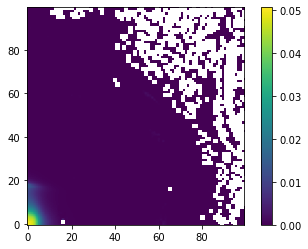

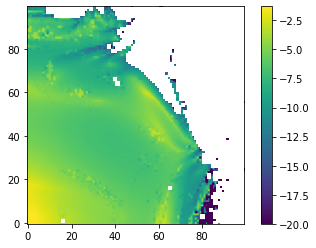

In [9]:
plt.figure()
plt.imshow((gali).reshape(100, 100), origin="lower")
plt.colorbar()

plt.figure()
plt.imshow(np.log10(gali).reshape(100, 100), origin="lower", vmin=-20)
print(np.nanmax(np.log10(gali)))
print(np.nanmin(np.log10(gali)))
plt.colorbar()

In [73]:
np.unique(np.linalg.norm([disp_x_x, disp_x_px, disp_x_y, disp_x_py, disp_x_zeta, disp_x_delta], axis=0))

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan])

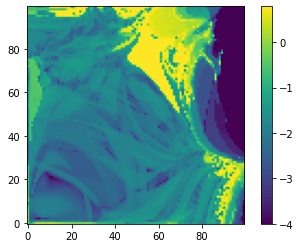

In [91]:
t = 100
with h5py.File("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_test/tune_b1_worst.h5", mode="r") as h5:
    tune_x_1 = h5[f"tune/x/0/{t//2}"][:]
    tune_x_2 = h5[f"tune/x/{t//2}/{t}"][:]
    tune_y_1 = h5[f"tune/y/0/{t//2}"][:]
    tune_y_2 = h5[f"tune/y/{t//2}/{t}"][:]

tune_diff = np.sqrt(
    (tune_x_1 - tune_x_2)**2 + (tune_y_1 - tune_y_2)**2
)

plt.figure()
plt.imshow(np.log10(tune_diff).reshape(100, 100), origin="lower", vmin=-4)
plt.colorbar()

In [92]:
def birkhoff_weights(n):
    weights = np.arange(n, dtype=np.float64)
    weights /= n
    weights = np.exp(-1 / (weights * (1 - weights)))
    return weights / np.sum(weights)

In [93]:
test = birkhoff_weights(1000)

/tmp/ipykernel_25804/3429502636.py:4: RuntimeWarning: divide by zero encountered in true_divide
  weights = np.exp(-1 / (weights * (1 - weights)))


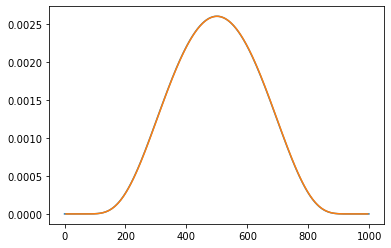

In [104]:
test

f_test = np.zeros_like(test)
for i in range(10):
    f_test += np.roll(test, -i)

f_test = f_test[::10]

plt.figure()
plt.plot(test)
plt.plot(np.arange(5, len(test)+5, 10), f_test/10)

In [2]:
context = xo.ContextCupy()
pt = xp.Particles(
    x=[0.001],
    y=[0.001],
    p0c=7e12,
    _context=context
)
pt_bis = pt.copy()

In [3]:
pt_bis = add_normed_displacement_to_particles(pt_bis, 1, "x")

In [4]:
normed_distance(pt, pt_bis, "6d")

array([1.])

In [5]:
normed_direction(pt, pt_bis, "6d")

((array([1.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.])),
 array([1.]))

In [14]:
pt_bis.px += 1e-3
pt_bis.py += 1e-3
pt_bis.y += 1e-3

In [15]:
print(normed_direction(pt, pt_bis, "6d"))
print(normed_distance(pt, pt_bis, "6d"))
realign_normed_particles(pt, pt_bis, 1, "6d")
print(normed_direction(pt, pt_bis, "6d"))
print(normed_distance(pt, pt_bis, "6d"))


((array([7.66646478e-19]), array([0.70710664]), array([0.00070711]), array([0.70710657]), array([0.]), array([0.])), array([14142139.86637104]))
[14142139.86637104]
((array([0.]), array([0.70710664]), array([0.00070711]), array([0.70710657]), array([0.]), array([0.])), array([1.]))
[1.]
